[**Demo %s**](#demo-subspace-unstable)

First we define a triangular matrix with known eigenvalues, and a random vector $b$.

In [2]:
λ = @. 10 + (1:100)
A = triu(rand(100, 100), 1) + diagm(λ)
b = rand(100);

Next we build up the first ten Krylov matrices iteratively, using renormalization after each matrix-vector multiplication.

In [3]:
Km = [b zeros(100, 29)]
for m in 1:29
    v = A * Km[:, m]
    Km[:, m+1] = v / norm(v)
end

Now we solve least-squares problems for Krylov matrices of increasing dimension, recording the residual in each case.

In [4]:
resid = zeros(30)
for m in 1:30
    z = (A * Km[:, 1:m]) \ b
    x = Km[:, 1:m] * z
    resid[m] = norm(b - A * x)
end

The linear system approximations show smooth linear convergence at first, but the convergence stagnates after only a few digits have been found.

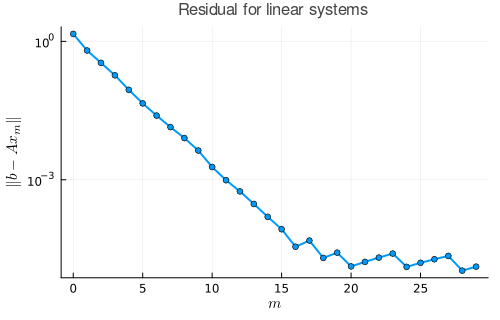

In [5]:
plot(0:29, resid; m=:o,
    xaxis=(L"m"), yaxis=(:log10, L"\| b-Ax_m \|"),
    title="Residual for linear systems", legend=:none)